In [63]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
 
dataset = pd.read_csv('rice2.csv')

#df_new['Rainfall'].value_counts()
dataset=dataset.drop(['Production'],axis=1)

dataset['fertilizer'] = (dataset['DAP'] +dataset['MAP'] +dataset['MOP'] +dataset['NPK'] +dataset['UREA'] +dataset['TSP'] )/6

dataset=dataset.drop(['DAP'],axis=1)
dataset=dataset.drop(['MAP'],axis=1)
dataset=dataset.drop(['MOP'],axis=1)
dataset=dataset.drop(['NPK'],axis=1)
dataset=dataset.drop(['UREA'],axis=1)
dataset=dataset.drop(['TSP'],axis=1)
dataset

,Area,Labour_hours,Rainfall,Yield,fertilizer
0,292000,419.7,649,3010.273973,0.775
1,305000,419.7,649,2878.688525,0.775
2,319000,419.7,649,3106.583072,0.775
3,319000,419.7,649,3047.021944,0.775
4,319000,419.7,649,3003.134796,0.775
...,...,...,...,...,...
3023,6175,859.5,494,927.125506,0.805
3024,5759,859.5,494,739.017190,0.805
3025,3689,859.5,494,545.676335,0.805
3026,4253,859.5,494,609.922408,0.805


[[ 2.97659763 -2.80901031  0.14113402  0.6887118   0.23000624]
 [ 3.15229406 -2.80901031  0.14113402  0.53990963  0.23000624]
 [ 3.3415056  -2.80901031  0.14113402  0.79762205  0.23000624]
 ...
 [-0.91995722  0.39873035 -0.58319446 -2.09835543  0.57950749]
 [-0.9123347   0.39873035 -0.58319446 -2.02570336  0.57950749]
 [-0.90384721  0.39873035 -0.58319446 -1.49469508  0.57950749]]


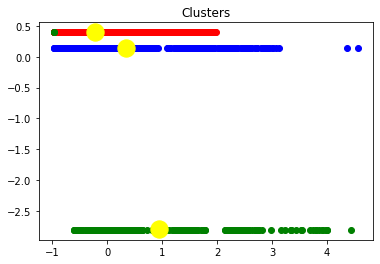

In [64]:


#scaler = StandardScaler() 
  
# To scale data 
#scaler.fit(dataset)

#X = preprocessing.scale(dataset)

#print(dataset)

#min_max_scaler = preprocessing.MinMaxScaler()
#X = min_max_scaler.fit_transform(dataset)

scalerX = StandardScaler().fit(dataset)

X = scalerX.transform(dataset)


#X=X_scaled.values
#X=dataset.values
print(X)

#X_old = scalerX.inverse_transform(X)

#print(X_old)

# Applying k-means to the sample dataset
#k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 
#Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
#Determines random number generation for centroid initialization.
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0) 
#Compute cluster centers and predict cluster index for each sample.
y_kmeans = kmeans.fit_predict(X)
dataset['Cluster'] = pd.Series(y_kmeans, index=dataset.index)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],c='red',label='A')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],c='blue',label='B')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],c='green',label='C')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3,1],c='pink',label='D')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters')

plt.show()

In [65]:
dataset

,Area,Labour_hours,Rainfall,Yield,fertilizer,Cluster
0,292000,419.7,649,3010.273973,0.775,2
1,305000,419.7,649,2878.688525,0.775,2
2,319000,419.7,649,3106.583072,0.775,2
3,319000,419.7,649,3047.021944,0.775,2
4,319000,419.7,649,3003.134796,0.775,2
...,...,...,...,...,...,...
3023,6175,859.5,494,927.125506,0.805,0
3024,5759,859.5,494,739.017190,0.805,0
3025,3689,859.5,494,545.676335,0.805,0
3026,4253,859.5,494,609.922408,0.805,0


In [66]:
grouped = dataset.groupby(dataset.Cluster)

cluster0 = grouped.get_group(0)
cluster1 = grouped.get_group(1)
cluster2 = grouped.get_group(2)


In [67]:
cluster0=cluster0.drop(['Cluster'],axis=1)
cluster1=cluster1.drop(['Cluster'],axis=1)
cluster2=cluster2.drop(['Cluster'],axis=1)

In [68]:
bin_area = [-1,59963,153521,410000]
bin_labour = [-1,600,850,1000]
bin_rainfall = [-1,500,700,1200]
bin_yield= [-1,2000,3000,11000]
bin_fertilizer=[0,0.7,0.9,1]

In [76]:
category = pd.cut(cluster0.Area,bin_area)
category = category.to_frame()
category.columns = ['range_area']
#concatenate age and its bin
df_new = pd.concat([cluster0,category],axis = 1)
df_new
category = pd.cut(cluster0.Labour_hours,bin_labour)
category = category.to_frame()
category.columns = ['range_labour']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new
category = pd.cut(cluster0.Rainfall,bin_rainfall)
category = category.to_frame()
category.columns = ['range_rainfall']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

category = pd.cut(cluster0.Yield,bin_yield)
category = category.to_frame()
category.columns = ['range_yield']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

category = pd.cut(cluster0.fertilizer,bin_fertilizer)
category = category.to_frame()
category.columns = ['range_fertilizer']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new


df_new=df_new.drop(['Area'],axis=1)
df_new=df_new.drop(['Labour_hours'],axis=1)
df_new=df_new.drop(['Rainfall'],axis=1)
df_new=df_new.drop(['Yield'],axis=1)
df_new=df_new.drop(['fertilizer'],axis=1)
# df_new=df_new.drop(['DAP'],axis=1)
# df_new=df_new.drop(['MAP'],axis=1)
# df_new=df_new.drop(['MOP'],axis=1)
# df_new=df_new.drop(['NPK'],axis=1)
# df_new=df_new.drop(['UREA'],axis=1)
# df_new=df_new.drop(['TSP'],axis=1)

import numpy as np 
import pandas as pd 
from mlxtend.frequent_patterns import apriori, association_rules 


dummies1=pd.get_dummies(df_new.range_area)
dummies2=pd.get_dummies(df_new.range_labour)
dummies3=pd.get_dummies(df_new.range_rainfall)
dummies4=pd.get_dummies(df_new.range_yield)
dummies5=pd.get_dummies(df_new.range_fertilizer)

# dummies5=pd.get_dummies(df_new.range_dap)
# dummies6=pd.get_dummies(df_new.range_map)
# dummies7=pd.get_dummies(df_new.range_mop)
# dummies8=pd.get_dummies(df_new.range_npk)
# dummies9=pd.get_dummies(df_new.range_urea)
# dummies10=pd.get_dummies(df_new.range_tsp)


#merged=pd.concat([df_new,dummies1,dummies2,dummies3,dummies4,dummies5,dummies6,dummies7,dummies8,dummies9,dummies10],axis='columns')
merged=pd.concat([df_new,dummies1,dummies2,dummies3,dummies4,dummies5],axis='columns')
merged



#merged = merged.rename(columns={'(-1, 59963]': '(-1, 59963]_A','(59963, 153521]':'(59963, 153521]_A'})

merged=merged.drop(['range_area'],axis=1)
merged=merged.drop(['range_labour'],axis=1)
merged=merged.drop(['range_rainfall'],axis=1)
merged=merged.drop(['range_yield'],axis=1)
merged=merged.drop(['range_fertilizer'],axis=1)

# merged=merged.drop(['range_dap'],axis=1)
# merged=merged.drop(['range_map'],axis=1)
# merged=merged.drop(['range_mop'],axis=1)
# merged=merged.drop(['range_npk'],axis=1)
# merged=merged.drop(['range_urea'],axis=1)
# merged=merged.drop(['range_tsp'],axis=1)



#merged.columns=['(-1, 59963]_a','(59963, 153521]_a','(153521, 410000]_a','(-1, 419]_','(419, 600]_l','(600, 1000]_l','(-1, 494]_r','(494, 800]_r','(800, 1200]_r','(-1, 2000]_y','(2000, 3000]_y','(3000, 11000]_y','(0.0, 0.3]_dap','(0.3, 0.6]_dap','(0.6, 1.0]_dap','(0.0, 0.3]_map','(0.3, 0.6]_map','(0.6, 1.0]_map','(0.0, 0.3]_mop','(0.3, 0.6]_mop','(0.6, 1.0]_mop','(0.0, 0.3]_npk','(0.3, 0.6]_npk','(0.6, 1.0]_npk','(0.0, 0.3]_urea','(0.3, 0.6]_urea','(0.6, 1.0]_urea','(0.0, 0.3]_tsp','(0.3, 0.6]_tsp','(0.6, 1.0]_tsp']
merged.columns=['(-1, 59963]_a','(59963, 153521]_a','(153521, 410000]_a','(-1, 600]_l','(600, 850]_l','(850, 1000]_l','(-1, 500]_r','(500, 700]_r','(700, 1200]_r','(-1, 2000]_y','(2000, 3000]_y','(3000, 11000]_y','(0.0, 0.7]_fert','(0.7, 0.9]_fert','(0.9, 1.0]_fert']

merged


frq_items = apriori(merged, min_support = 0.6, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
#print(rules.head()) 


rules.to_csv('rice_rules1.csv')
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,"((0.0, 0.7]_fert)","((-1, 500]_r)",0.729950,0.864522,0.729950,1.000000,1.156709,0.098892,inf
8,"((0.0, 0.7]_fert, (850, 1000]_l)","((-1, 500]_r)",0.729950,0.864522,0.729950,1.000000,1.156709,0.098892,inf
11,"((0.0, 0.7]_fert)","((850, 1000]_l, (-1, 500]_r)",0.729950,0.864522,0.729950,1.000000,1.156709,0.098892,inf
1,"((-1, 59963]_a)","((850, 1000]_l)",0.616674,1.000000,0.616674,1.000000,1.000000,0.000000,inf
3,"((-1, 500]_r)","((850, 1000]_l)",0.864522,1.000000,0.864522,1.000000,1.000000,0.000000,inf
4,"((0.0, 0.7]_fert)","((850, 1000]_l)",0.729950,1.000000,0.729950,1.000000,1.000000,0.000000,inf
9,"((0.0, 0.7]_fert, (-1, 500]_r)","((850, 1000]_l)",0.729950,1.000000,0.729950,1.000000,1.000000,0.000000,inf
2,"((850, 1000]_l)","((-1, 500]_r)",1.000000,0.864522,0.864522,0.864522,1.000000,0.000000,1.000000
7,"((-1, 500]_r)","((0.0, 0.7]_fert)",0.864522,0.729950,0.729950,0.844340,1.156709,0.098892,1.734866
10,"((850, 1000]_l, (-1, 500]_r)","((0.0, 0.7]_fert)",0.864522,0.729950,0.729950,0.844340,1.156709,0.098892,1.734866


In [74]:
category = pd.cut(cluster1.Area,bin_area)
category = category.to_frame()
category.columns = ['range_area']
#concatenate age and its bin
df_new = pd.concat([cluster1,category],axis = 1)
df_new
category = pd.cut(cluster1.Labour_hours,bin_labour)
category = category.to_frame()
category.columns = ['range_labour']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new
category = pd.cut(cluster1.Rainfall,bin_rainfall)
category = category.to_frame()
category.columns = ['range_rainfall']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

category = pd.cut(cluster1.Yield,bin_yield)
category = category.to_frame()
category.columns = ['range_yield']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

category = pd.cut(cluster1.fertilizer,bin_fertilizer)
category = category.to_frame()
category.columns = ['range_fertilizer']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new


df_new=df_new.drop(['Area'],axis=1)
df_new=df_new.drop(['Labour_hours'],axis=1)
df_new=df_new.drop(['Rainfall'],axis=1)
df_new=df_new.drop(['Yield'],axis=1)
df_new=df_new.drop(['fertilizer'],axis=1)
# df_new=df_new.drop(['DAP'],axis=1)
# df_new=df_new.drop(['MAP'],axis=1)
# df_new=df_new.drop(['MOP'],axis=1)
# df_new=df_new.drop(['NPK'],axis=1)
# df_new=df_new.drop(['UREA'],axis=1)
# df_new=df_new.drop(['TSP'],axis=1)

import numpy as np 
import pandas as pd 
from mlxtend.frequent_patterns import apriori, association_rules 


dummies1=pd.get_dummies(df_new.range_area)
dummies2=pd.get_dummies(df_new.range_labour)
dummies3=pd.get_dummies(df_new.range_rainfall)
dummies4=pd.get_dummies(df_new.range_yield)
dummies5=pd.get_dummies(df_new.range_fertilizer)

# dummies5=pd.get_dummies(df_new.range_dap)
# dummies6=pd.get_dummies(df_new.range_map)
# dummies7=pd.get_dummies(df_new.range_mop)
# dummies8=pd.get_dummies(df_new.range_npk)
# dummies9=pd.get_dummies(df_new.range_urea)
# dummies10=pd.get_dummies(df_new.range_tsp)


#merged=pd.concat([df_new,dummies1,dummies2,dummies3,dummies4,dummies5,dummies6,dummies7,dummies8,dummies9,dummies10],axis='columns')
merged=pd.concat([df_new,dummies1,dummies2,dummies3,dummies4,dummies5],axis='columns')
merged



#merged = merged.rename(columns={'(-1, 59963]': '(-1, 59963]_A','(59963, 153521]':'(59963, 153521]_A'})

merged=merged.drop(['range_area'],axis=1)
merged=merged.drop(['range_labour'],axis=1)
merged=merged.drop(['range_rainfall'],axis=1)
merged=merged.drop(['range_yield'],axis=1)
merged=merged.drop(['range_fertilizer'],axis=1)

# merged=merged.drop(['range_dap'],axis=1)
# merged=merged.drop(['range_map'],axis=1)
# merged=merged.drop(['range_mop'],axis=1)
# merged=merged.drop(['range_npk'],axis=1)
# merged=merged.drop(['range_urea'],axis=1)
# merged=merged.drop(['range_tsp'],axis=1)



#merged.columns=['(-1, 59963]_a','(59963, 153521]_a','(153521, 410000]_a','(-1, 419]_','(419, 600]_l','(600, 1000]_l','(-1, 494]_r','(494, 800]_r','(800, 1200]_r','(-1, 2000]_y','(2000, 3000]_y','(3000, 11000]_y','(0.0, 0.3]_dap','(0.3, 0.6]_dap','(0.6, 1.0]_dap','(0.0, 0.3]_map','(0.3, 0.6]_map','(0.6, 1.0]_map','(0.0, 0.3]_mop','(0.3, 0.6]_mop','(0.6, 1.0]_mop','(0.0, 0.3]_npk','(0.3, 0.6]_npk','(0.6, 1.0]_npk','(0.0, 0.3]_urea','(0.3, 0.6]_urea','(0.6, 1.0]_urea','(0.0, 0.3]_tsp','(0.3, 0.6]_tsp','(0.6, 1.0]_tsp']
merged.columns=['(-1, 59963]_a','(59963, 153521]_a','(153521, 410000]_a','(-1, 600]_l','(600, 850]_l','(850, 1000]_l','(-1, 500]_r','(500, 700]_r','(700, 1200]_r','(-1, 2000]_y','(2000, 3000]_y','(3000, 11000]_y','(0.0, 0.7]_fert','(0.7, 0.9]_fert','(0.9, 1.0]_fert']

merged


frq_items = apriori(merged, min_support = 0.4, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
#print(rules.head()) 


rules.to_csv('rice_rules2.csv')
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,"((-1, 59963]_a)","((600, 850]_l)",0.492723,1.000000,0.492723,1.000000,1.0,0.0,inf
3,"((-1, 59963]_a)","((700, 1200]_r)",0.492723,1.000000,0.492723,1.000000,1.0,0.0,inf
5,"((-1, 59963]_a)","((0.9, 1.0]_fert)",0.492723,1.000000,0.492723,1.000000,1.0,0.0,inf
6,"((600, 850]_l)","((700, 1200]_r)",1.000000,1.000000,1.000000,1.000000,1.0,0.0,inf
7,"((700, 1200]_r)","((600, 850]_l)",1.000000,1.000000,1.000000,1.000000,1.0,0.0,inf
...,...,...,...,...,...,...,...,...,...
103,"((600, 850]_l, (0.9, 1.0]_fert)","((700, 1200]_r, (2000, 3000]_y)",1.000000,0.419958,0.419958,0.419958,1.0,0.0,1.0
105,"((0.9, 1.0]_fert, (700, 1200]_r)","((600, 850]_l, (2000, 3000]_y)",1.000000,0.419958,0.419958,0.419958,1.0,0.0,1.0
108,"((600, 850]_l)","((0.9, 1.0]_fert, (700, 1200]_r, (2000, 3000]_y)",1.000000,0.419958,0.419958,0.419958,1.0,0.0,1.0
109,"((700, 1200]_r)","((600, 850]_l, (0.9, 1.0]_fert, (2000, 3000]_y)",1.000000,0.419958,0.419958,0.419958,1.0,0.0,1.0


In [75]:
category = pd.cut(cluster2.Area,bin_area)
category = category.to_frame()
category.columns = ['range_area']
#concatenate age and its bin
df_new = pd.concat([cluster2,category],axis = 1)
df_new
category = pd.cut(cluster2.Labour_hours,bin_labour)
category = category.to_frame()
category.columns = ['range_labour']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new
category = pd.cut(cluster2.Rainfall,bin_rainfall)
category = category.to_frame()
category.columns = ['range_rainfall']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

category = pd.cut(cluster2.Yield,bin_yield)
category = category.to_frame()
category.columns = ['range_yield']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

category = pd.cut(cluster2.fertilizer,bin_fertilizer)
category = category.to_frame()
category.columns = ['range_fertilizer']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new


df_new=df_new.drop(['Area'],axis=1)
df_new=df_new.drop(['Labour_hours'],axis=1)
df_new=df_new.drop(['Rainfall'],axis=1)
df_new=df_new.drop(['Yield'],axis=1)
df_new=df_new.drop(['fertilizer'],axis=1)
# df_new=df_new.drop(['DAP'],axis=1)
# df_new=df_new.drop(['MAP'],axis=1)
# df_new=df_new.drop(['MOP'],axis=1)
# df_new=df_new.drop(['NPK'],axis=1)
# df_new=df_new.drop(['UREA'],axis=1)
# df_new=df_new.drop(['TSP'],axis=1)

import numpy as np 
import pandas as pd 
from mlxtend.frequent_patterns import apriori, association_rules 


dummies1=pd.get_dummies(df_new.range_area)
dummies2=pd.get_dummies(df_new.range_labour)
dummies3=pd.get_dummies(df_new.range_rainfall)
dummies4=pd.get_dummies(df_new.range_yield)
dummies5=pd.get_dummies(df_new.range_fertilizer)

# dummies5=pd.get_dummies(df_new.range_dap)
# dummies6=pd.get_dummies(df_new.range_map)
# dummies7=pd.get_dummies(df_new.range_mop)
# dummies8=pd.get_dummies(df_new.range_npk)
# dummies9=pd.get_dummies(df_new.range_urea)
# dummies10=pd.get_dummies(df_new.range_tsp)


#merged=pd.concat([df_new,dummies1,dummies2,dummies3,dummies4,dummies5,dummies6,dummies7,dummies8,dummies9,dummies10],axis='columns')
merged=pd.concat([df_new,dummies1,dummies2,dummies3,dummies4,dummies5],axis='columns')
merged



#merged = merged.rename(columns={'(-1, 59963]': '(-1, 59963]_A','(59963, 153521]':'(59963, 153521]_A'})

merged=merged.drop(['range_area'],axis=1)
merged=merged.drop(['range_labour'],axis=1)
merged=merged.drop(['range_rainfall'],axis=1)
merged=merged.drop(['range_yield'],axis=1)
merged=merged.drop(['range_fertilizer'],axis=1)

# merged=merged.drop(['range_dap'],axis=1)
# merged=merged.drop(['range_map'],axis=1)
# merged=merged.drop(['range_mop'],axis=1)
# merged=merged.drop(['range_npk'],axis=1)
# merged=merged.drop(['range_urea'],axis=1)
# merged=merged.drop(['range_tsp'],axis=1)



#merged.columns=['(-1, 59963]_a','(59963, 153521]_a','(153521, 410000]_a','(-1, 419]_','(419, 600]_l','(600, 1000]_l','(-1, 494]_r','(494, 800]_r','(800, 1200]_r','(-1, 2000]_y','(2000, 3000]_y','(3000, 11000]_y','(0.0, 0.3]_dap','(0.3, 0.6]_dap','(0.6, 1.0]_dap','(0.0, 0.3]_map','(0.3, 0.6]_map','(0.6, 1.0]_map','(0.0, 0.3]_mop','(0.3, 0.6]_mop','(0.6, 1.0]_mop','(0.0, 0.3]_npk','(0.3, 0.6]_npk','(0.6, 1.0]_npk','(0.0, 0.3]_urea','(0.3, 0.6]_urea','(0.6, 1.0]_urea','(0.0, 0.3]_tsp','(0.3, 0.6]_tsp','(0.6, 1.0]_tsp']
merged.columns=['(-1, 59963]_a','(59963, 153521]_a','(153521, 410000]_a','(-1, 600]_l','(600, 850]_l','(850, 1000]_l','(-1, 500]_r','(500, 700]_r','(700, 1200]_r','(-1, 2000]_y','(2000, 3000]_y','(3000, 11000]_y','(0.0, 0.7]_fert','(0.7, 0.9]_fert','(0.9, 1.0]_fert']

merged


frq_items = apriori(merged, min_support = 0.4, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
#print(rules.head()) 


rules.to_csv('rice_rules3.csv')
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"((59963, 153521]_a)","((-1, 600]_l)",0.417647,0.994118,0.417647,1.000000,1.005917,0.002457,inf
7,"((153521, 410000]_a)","((-1, 600]_l)",0.402941,0.994118,0.402941,1.000000,1.005917,0.002370,inf
20,"((59963, 153521]_a, (500, 700]_r)","((-1, 600]_l)",0.417647,0.994118,0.417647,1.000000,1.005917,0.002457,inf
23,"((59963, 153521]_a)","((-1, 600]_l, (500, 700]_r)",0.417647,0.994118,0.417647,1.000000,1.005917,0.002457,inf
26,"((59963, 153521]_a, (0.7, 0.9]_fert)","((-1, 600]_l)",0.417647,0.994118,0.417647,1.000000,1.005917,0.002457,inf
...,...,...,...,...,...,...,...,...,...
95,"((500, 700]_r)","((-1, 600]_l, (153521, 410000]_a, (0.7, 0.9]_f...",0.997059,0.402941,0.402941,0.404130,1.002950,0.001185,1.001995
10,"((0.7, 0.9]_fert)","((153521, 410000]_a)",1.000000,0.402941,0.402941,0.402941,1.000000,0.000000,1.000000
49,"((0.7, 0.9]_fert)","((-1, 600]_l, (153521, 410000]_a)",1.000000,0.402941,0.402941,0.402941,1.000000,0.000000,1.000000
53,"((0.7, 0.9]_fert)","((500, 700]_r, (153521, 410000]_a)",1.000000,0.402941,0.402941,0.402941,1.000000,0.000000,1.000000
